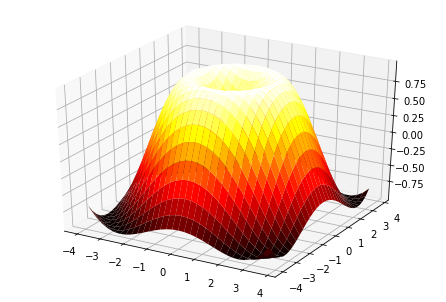

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
X = np.arange(-4, 4, 0.25)
Y = np.arange(-4, 4, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap='hot')

plt.show()

((0, 1), [])

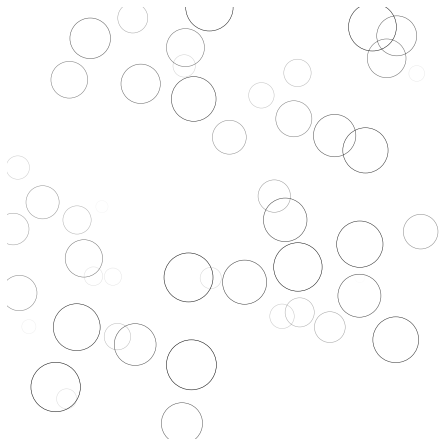

In [5]:


# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figure, no frame and a 1:1 aspect ratio
ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
n = 50
size_min = 50
size_max = 50*50

# Ring position
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)
# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


In [6]:
import urllib
from mpl_toolkits.basemap import Basemap

# -> http://earthquake.usgs.gov/earthquakes/feed/v1.0/csv.php
feed = "http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/"

# Significant earthquakes in the last 30 days
# url = urllib.request.urlopen(feed + "significant_month.csv")

# Magnitude > 4.5
url = urllib.request.urlopen(feed + "4.5_month.csv")

# Magnitude > 2.5
# url = urllib.request.urlopen(feed + "2.5_month.csv")

# Magnitude > 1.0
# url = urllib.request.urlopen(feed + "1.0_month.csv")

# Reading and storage of data
data = url.read()
data = data.split(b'\n')[+1:-1]
E = np.zeros(len(data), dtype=[('position',  float, 2),
                               ('magnitude', float, 1)])

for i in range(len(data)):
    row = data[i].split(',')
    E['position'][i] = float(row[2]),float(row[1])
    E['magnitude'][i] = float(row[4])

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [12]:
import matplotlib.pyplot as plt

size = 128,16
dpi = 72.0
figsize= size[0]/float(dpi),size[1]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0,0,1,1], frameon=False)

plt.rcParams['text.antialiased'] = False
plt.text(0.5,0.5,"Aliased",ha='center',va='center')

plt.xlim(0,1),plt.ylim(0,1),
plt.xticks([]),plt.yticks([])
plt.show()
plt.savefig('aliased.png', dpi=dpi)

<Figure size 432x288 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

size = 256,16
dpi = 72.0
figsize= size[0]/float(dpi),size[1]/float(dpi)
fig = plt.figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
plt.axes([0,0.1,1,.8], frameon=False)

for i in range(1,11):
    plt.axvline(i, linewidth=1, color='blue',alpha=.25+.75*i/10.)

plt.xlim(0,11)
plt.xticks([]), plt.yticks([])
plt.savefig('alpha.png', dpi=dpi)

TypeError: __init__() got multiple values for argument 'width'

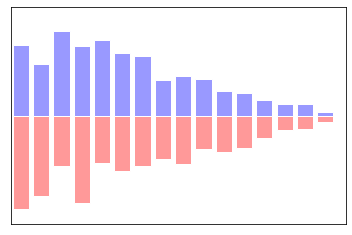

In [17]:
import numpy as np
import matplotlib.pyplot as plt

n = 16
X = np.arange(n)
Y1 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
Y2 = (1-X/float(n)) * np.random.uniform(0.5,1.0,n)
plt.bar(X, +Y1, facecolor='#9999ff', edgecolor='white')
plt.bar(X, -Y2, facecolor='#ff9999', edgecolor='white')
plt.xlim(-.5,n), plt.xticks([])
plt.ylim(-1,+1), plt.yticks([])

plt.text(-0.05, 1.05, " Bar Plot \n\n",
         horizontalalignment='left',
         verticalalignment='top',
         family='Lint McCree Intl BB',
         size='x-large',
         bbox=dict(facecolor='white', alpha=1.0, width=37, height=65)
        
        )

plt.text(-0.05, .975, " Make a bar plot with rectangles ",
         horizontalalignment='left',
         verticalalignment='top',
         family='Lint McCree Intl BB',
         size='medium')

# plt.savefig('../figures/bar.png', dpi=64)
plt.show()

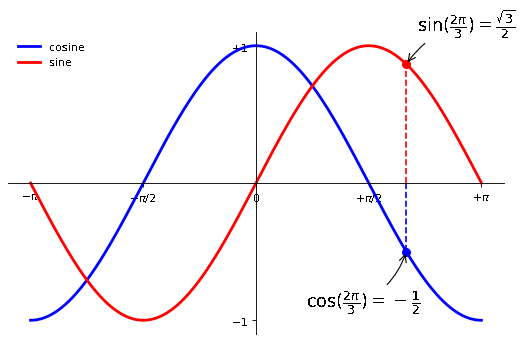

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), dpi=80)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-",  label="sine")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, +1],
           [r'$-1$', r'$+1$'])

t = 2*np.pi/3
plt.plot([t,t],[0,np.cos(t)],
         color ='blue',  linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.cos(t),], 50, color ='blue')
plt.annotate(r'$\cos(\frac{2\pi}{3})=-\frac{1}{2}$',
             xy=(t, np.cos(t)),  xycoords='data',
             xytext=(-90, -50), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.plot([t,t],[0,np.sin(t)],
         color ='red',  linewidth=1.5, linestyle="--")
plt.scatter([t,],[np.sin(t),], 50, color ='red')
plt.annotate(r'$\sin(\frac{2\pi}{3})=\frac{\sqrt{3}}{2}$',
             xy=(t, np.sin(t)),  xycoords='data',
             xytext=(+10, +30), textcoords='offset points', fontsize=16,
             arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=.2"))

plt.legend(loc='upper left', frameon=False)
# plt.savefig("../figures/exercice_9.png",dpi=72)
plt.show()

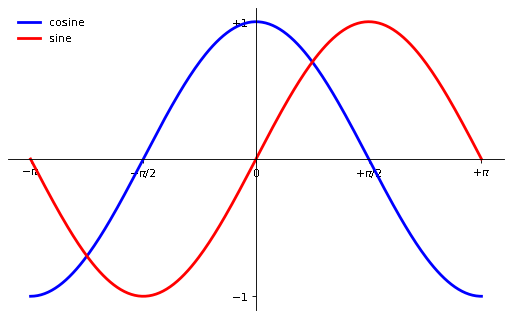

In [19]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), dpi=80)
ax = plt.subplot(111)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-", label="cosine")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-", label="sine")

plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
           [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, +1],
           [r'$-1$', r'$+1$'])

plt.legend(loc='upper left', frameon=False)
# plt.savefig("../figures/exercice_8.png",dpi=72)
plt.show()


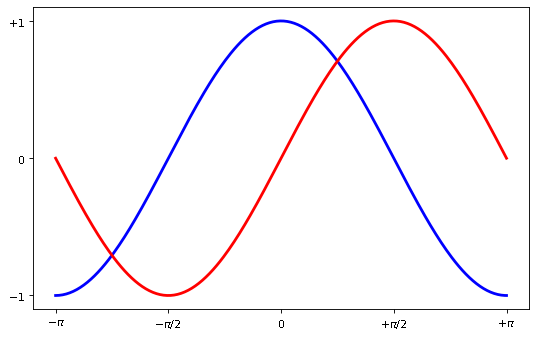

In [21]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5), dpi=80)
ax = plt.subplot(111)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.spines['bottom'].set_position(('data',0))
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

plt.plot(X, C, color="blue", linewidth=2.5, linestyle="-")
plt.plot(X, S, color="red", linewidth=2.5, linestyle="-")


plt.xlim(X.min()*1.1, X.max()*1.1)
plt.xticks([-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
       [r'$-\pi$', r'$-\pi/2$', r'$0$', r'$+\pi/2$', r'$+\pi$'])

plt.ylim(C.min()*1.1,C.max()*1.1)
plt.yticks([-1, 0, +1],
       [r'$-1$', r'$0$', r'$+1$'])

plt.show()

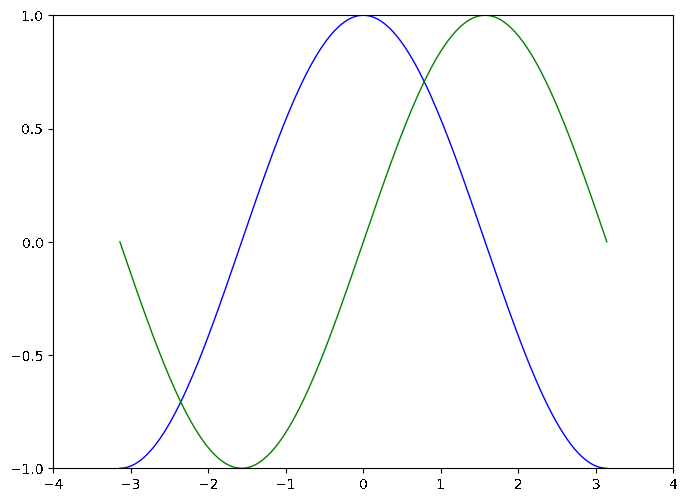

In [22]:
# Imports
import numpy as np
import matplotlib.pyplot as plt

# Create a new figure of size 8x6 points, using 100 dots per inch
plt.figure(figsize=(8,6), dpi=100)

# Create a new subplot from a grid of 1x1
plt.subplot(111)

X = np.linspace(-np.pi, np.pi, 256,endpoint=True)
C,S = np.cos(X), np.sin(X)

# Plot cosine using blue color with a continuous line of width 1 (pixels)
plt.plot(X, C, color="blue", linewidth=1.0, linestyle="-")

# Plot sine using green color with a continuous line of width 1 (pixels)
plt.plot(X, S, color="green", linewidth=1.0, linestyle="-")

# Set x limits
plt.xlim(-4.0,4.0)

# Set x ticks
plt.xticks(np.linspace(-4,4,9,endpoint=True))

# Set y limits
plt.ylim(-1.0,1.0)

# Set y ticks
plt.yticks(np.linspace(-1,1,5,endpoint=True))

# Save figure using 72 dots per inch
# savefig("../figures/exercice_2.png",dpi=72)

# Show result on screen
plt.show()

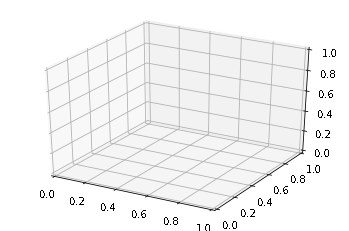

In [23]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.axes(projection="3d")

plt.show()

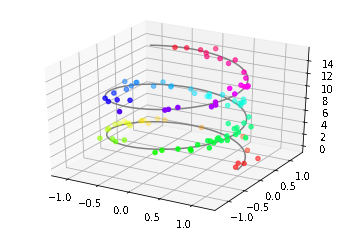

In [24]:
fig = plt.figure()
ax = plt.axes(projection="3d")

z_line = np.linspace(0, 15, 1000)
x_line = np.cos(z_line)
y_line = np.sin(z_line)
ax.plot3D(x_line, y_line, z_line, 'gray')

z_points = 15 * np.random.random(100)
x_points = np.cos(z_points) + 0.1 * np.random.randn(100)
y_points = np.sin(z_points) + 0.1 * np.random.randn(100)
ax.scatter3D(x_points, y_points, z_points, c=z_points, cmap='hsv');

plt.show()

TypeError: __init__() got multiple values for argument 'width'

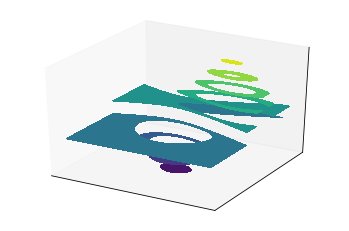

In [26]:
from pylab import *
from mpl_toolkits.mplot3d import axes3d


ax = gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contourf(X, Y, Z)
ax.clabel(cset, fontsize=9, inline=1)

plt.xticks([]), plt.yticks([]), 
ax.set_zticks([])

ax.text2D(-0.05, 1.05, " 3D plots \n\n",
          horizontalalignment='left',
          verticalalignment='top',
          family='Lint McCree Intl BB',
          size='x-large',
          bbox=dict(facecolor='white', alpha=1.0, width=350,height=60),
          transform = gca().transAxes)

ax.text2D(-0.05, .975, " Plot 2D or 3D data",
          horizontalalignment='left',
          verticalalignment='top',
          family='Lint McCree Intl BB',
          size='medium',
          transform = gca().transAxes)

# plt.savefig('../figures/plot3d.png', dpi=64)
plt.show()

TypeError: __init__() got multiple values for argument 'width'

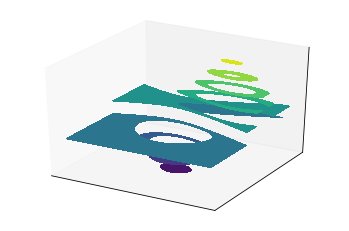

In [27]:
from pylab import *
from mpl_toolkits.mplot3d import axes3d


ax = gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)
cset = ax.contourf(X, Y, Z)
ax.clabel(cset, fontsize=9, inline=1)

plt.xticks([]), plt.yticks([]), 
ax.set_zticks([])

ax.text2D(-0.05, 1.05, " 3D plots \n\n",
          horizontalalignment='left',
          verticalalignment='top',
          family='Lint McCree Intl BB',
          size='x-large',
          bbox=dict(facecolor='white', alpha=1.0, width=350,height=60),
          transform = gca().transAxes)

ax.text2D(-0.05, .975, " Plot 2D or 3D data",
          horizontalalignment='left',
          verticalalignment='top',
          family='Lint McCree Intl BB',
          size='medium',
          transform = gca().transAxes)

plt.savefig('../figures/plot3d.png', dpi=64)
plt.show()

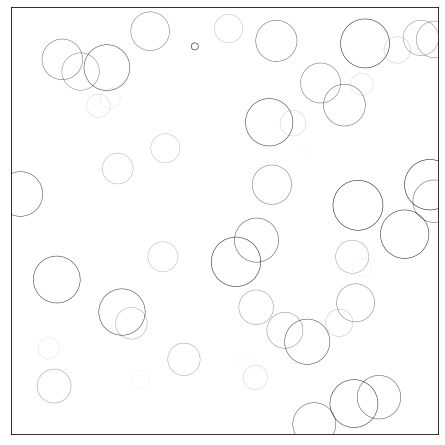

In [29]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# No toolbar
matplotlib.rcParams['toolbar'] = 'None'

# New figure with white background
fig = plt.figure(figsize=(6,6), facecolor='white')

# New axis over the whole figureand a 1:1 aspect ratio
# ax = fig.add_axes([0,0,1,1], frameon=False, aspect=1)
ax = fig.add_axes([0.005,0.005,0.990,0.990], frameon=True, aspect=1)

# Number of ring
n = 50
size_min = 50
size_max = 50*50
          
# Ring position 
P = np.random.uniform(0,1,(n,2))

# Ring colors
C = np.ones((n,4)) * (0,0,0,1)

# Alpha color channel goes from 0 (transparent) to 1 (opaque)
C[:,3] = np.linspace(0,1,n)

# Ring sizes
S = np.linspace(size_min, size_max, n)

# Scatter plot
scat = ax.scatter(P[:,0], P[:,1], s=S, lw = 0.5,
                  edgecolors = C, facecolors='None')

# Ensure limits are [0,1] and remove ticks
ax.set_xlim(0,1), ax.set_xticks([])
ax.set_ylim(0,1), ax.set_yticks([])


def update(frame):
    global P, C, S

    # Every ring is made more transparent
    C[:,3] = np.maximum(0, C[:,3] - 1.0/n)

    # Each ring is made larger
    S += (size_max - size_min) / n

    # Reset ring specific ring (relative to frame number)
    i = frame % 50
    P[i] = np.random.uniform(0,1,2)
    S[i] = size_min
    C[i,3] = 1

    # Update scatter object
    scat.set_edgecolors(C)
    scat.set_sizes(S)
    scat.set_offsets(P)
    return scat,

animation = FuncAnimation(fig, update, interval=10)
# animation.save('../figures/rain.gif', writer='imagemagick', fps=30, dpi=72)
plt.show()

In [30]:
from pylab import *

size = 256,16
dpi = 72.0
figsize= size[0]/float(dpi),size[1]/float(dpi)
fig = figure(figsize=figsize, dpi=dpi)
fig.patch.set_alpha(0)
axes([0,0,1,1], frameon=False)

plot(np.arange(3), [0,1,0], color="blue", linewidth=8, solid_joinstyle = 'miter')
plot(4+np.arange(3), [0,1,0], color="blue", linewidth=8, solid_joinstyle = 'bevel')
plot(8+np.arange(3), [0,1,0], color="blue", linewidth=8, solid_joinstyle = 'round')

xlim(0,12), ylim(-1,2)
xticks([]),yticks([])

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

TypeError: __init__() got multiple values for argument 'width'

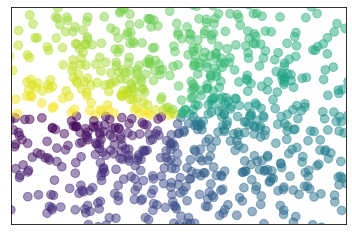

In [32]:
from pylab import *

n = 1024
X = np.random.normal(0,1,n)
Y = np.random.normal(0,1,n)

T = np.arctan2(Y,X)
scatter(X,Y,s=75,c=T,alpha=.5)
xlim(-1.5,1.5), xticks([])
ylim(-1.5,1.5), yticks([])

text(-0.05, 1.05, " Scatter Plot \n\n",
      horizontalalignment='left',
      verticalalignment='top',
      family='Lint McCree Intl BB',
      size='x-large',
      bbox=dict(facecolor='white', alpha=1.0, width=350,height=60),
      transform = gca().transAxes)

text(-0.05, .975, " Make a scatter plot of x versus y ",
      horizontalalignment='left',
      verticalalignment='top',
      family='Lint McCree Intl BB',
      size='medium',
      transform = gca().transAxes)
